# word2vecの分類　（kmeans Scikit-learn mecab）

Scikit-learnを使用してクラスター分類を行う。
Mecabによって単語などの分割を行う。
Kmeansのクラスター数を調べてみる。
PCAを基準としてどの値が最も使えるか調べる

In [ ]:
# 使用ライブラリのインストール

!pip install -U scikit-learn

!pip install --upgrade gensim

!pip install  --upgrade mecab

!brew install mecab
!brew install mecab-ipadic

In [1]:
import MeCab
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def kmeans_cluster_nouns_with_silhouette(model_path, cluster_range, batch_size=10000):
    """
    名詞に対してK-meansクラスタリングを行い、シルエットスコアを計算し、クラスタ数ごとにスコアをプロットする。
    """
    # Word2Vecモデルの読み込み
    model = KeyedVectors.load_word2vec_format(model_path, binary=False)

    # MeCabの初期化
    mecab = MeCab.Tagger('-r /opt/homebrew/etc/mecabrc -d /opt/homebrew/lib/mecab/dic/ipadic')

    # 名詞を格納するリスト
    nouns = []

    # モデル内の単語を解析して名詞を抽出
    for idx, word in enumerate(model.index_to_key):
        parsed = mecab.parse(word)
        for line in parsed.splitlines():
            if line == 'EOS':
                break
            fields = line.split('\t')
            if len(fields) > 1:
                pos_info = fields[1].split(',')
                if pos_info[0] == '名詞':
                    nouns.append(word)
                    break
        if len(nouns) >= batch_size:
            break  # バッチサイズに到達したら停止

    # 名詞のベクトルを取得
    noun_vectors = np.array([model[word] for word in nouns])

    silhouette_scores = []
    for num_clusters in cluster_range:
        print(f"Processing {num_clusters} clusters...")

        # K-meansクラスタリングの実行
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        cluster_indices = kmeans.fit_predict(noun_vectors)

        # シルエットスコアの計算
        score = silhouette_score(noun_vectors, cluster_indices)
        silhouette_scores.append(score)
        print(f"Silhouette Score for {num_clusters} clusters: {score}")

    # クラスタ数とシルエットスコアのグラフを描画
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Cluster Numbers')
    plt.grid(True)
    plt.show()


Processing 2 clusters...
Silhouette Score for 2 clusters: 0.03312988579273224
Processing 12 clusters...
Silhouette Score for 12 clusters: 0.02117050252854824
Processing 22 clusters...
Silhouette Score for 22 clusters: 0.025977548211812973
Processing 32 clusters...
Silhouette Score for 32 clusters: 0.03344721719622612
Processing 42 clusters...
Silhouette Score for 42 clusters: 0.040841810405254364
Processing 52 clusters...
Silhouette Score for 52 clusters: 0.04680793732404709
Processing 62 clusters...
Silhouette Score for 62 clusters: 0.05209397152066231
Processing 72 clusters...
Silhouette Score for 72 clusters: 0.05643104389309883
Processing 82 clusters...
Silhouette Score for 82 clusters: 0.05348458141088486
Processing 92 clusters...
Silhouette Score for 92 clusters: 0.05482766032218933


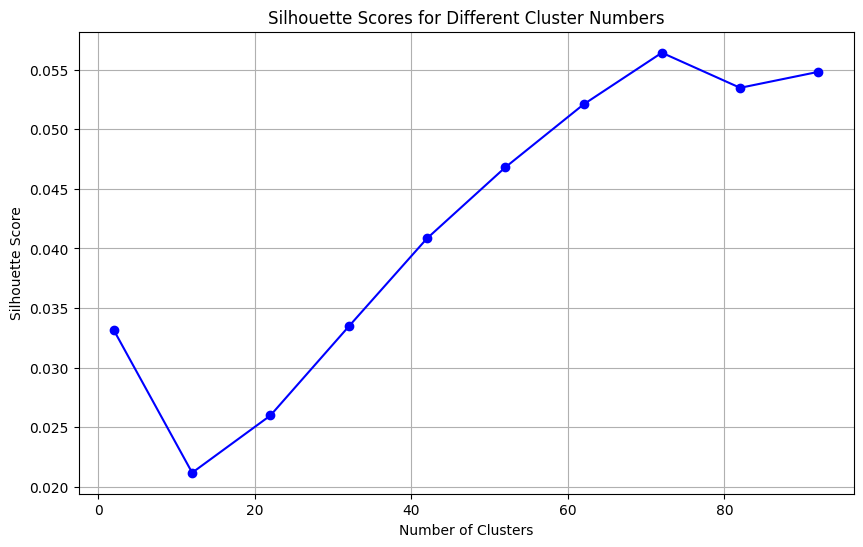

In [2]:
# 例として関数を呼び出す
model_path = '../data/japanese_word2vec_vectors.vec'  # モデルのパスを指定
cluster_range = range(2, 101, 10)  # クラスタ数の範囲を指定

kmeans_cluster_nouns_with_silhouette(model_path, cluster_range)

Processing 2 clusters...
Silhouette Score for 2 clusters: 0.03312988579273224
Processing 12 clusters...
Silhouette Score for 12 clusters: 0.02117050252854824
Processing 22 clusters...
Silhouette Score for 22 clusters: 0.025977548211812973
Processing 32 clusters...
Silhouette Score for 32 clusters: 0.03344721719622612
Processing 42 clusters...
Silhouette Score for 42 clusters: 0.040841810405254364
Processing 52 clusters...
Silhouette Score for 52 clusters: 0.04680793732404709
Processing 62 clusters...
Silhouette Score for 62 clusters: 0.05209397152066231
Processing 72 clusters...
Silhouette Score for 72 clusters: 0.05643104389309883
Processing 82 clusters...
Silhouette Score for 82 clusters: 0.05348458141088486
Processing 92 clusters...
Silhouette Score for 92 clusters: 0.05482766032218933
Processing 102 clusters...
Silhouette Score for 102 clusters: 0.05538158118724823
Processing 112 clusters...
Silhouette Score for 112 clusters: 0.05610114708542824
Processing 122 clusters...
Silhouett

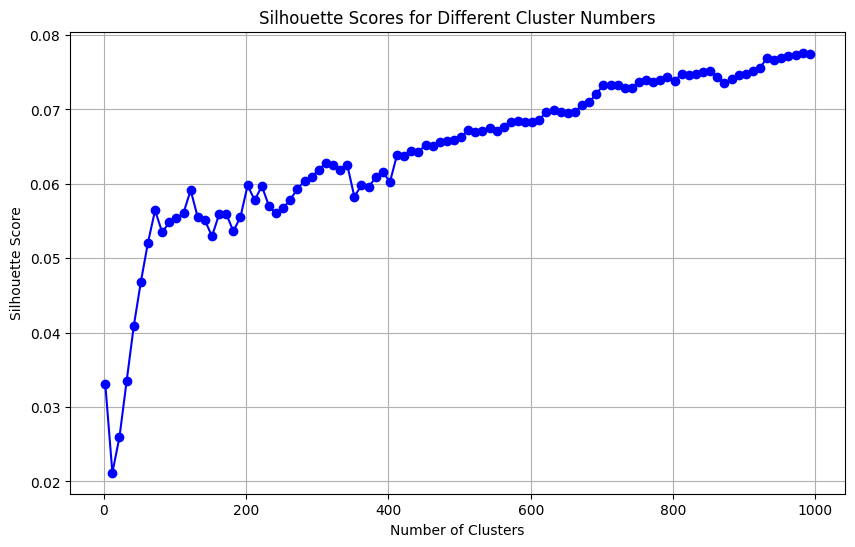

In [3]:
# 例として関数を呼び出す
model_path = '../data/japanese_word2vec_vectors.vec'  # モデルのパスを指定
cluster_range = range(2, 1001, 10)  # クラスタ数の範囲を指定

kmeans_cluster_nouns_with_silhouette(model_path, cluster_range)

Processing 2 clusters...
Silhouette Score for 2 clusters: 0.03312988579273224
Processing 3 clusters...
Silhouette Score for 3 clusters: 0.03092874214053154
Processing 4 clusters...
Silhouette Score for 4 clusters: 0.027859607711434364
Processing 5 clusters...
Silhouette Score for 5 clusters: 0.029503606259822845
Processing 6 clusters...
Silhouette Score for 6 clusters: 0.029197460040450096
Processing 7 clusters...
Silhouette Score for 7 clusters: 0.030043866485357285
Processing 8 clusters...
Silhouette Score for 8 clusters: 0.02761663869023323
Processing 9 clusters...
Silhouette Score for 9 clusters: 0.02894708514213562
Processing 10 clusters...
Silhouette Score for 10 clusters: 0.03128395974636078
Processing 11 clusters...
Silhouette Score for 11 clusters: 0.01959298364818096
Processing 12 clusters...
Silhouette Score for 12 clusters: 0.02117050252854824
Processing 13 clusters...
Silhouette Score for 13 clusters: 0.020853009074926376
Processing 14 clusters...
Silhouette Score for 14 c

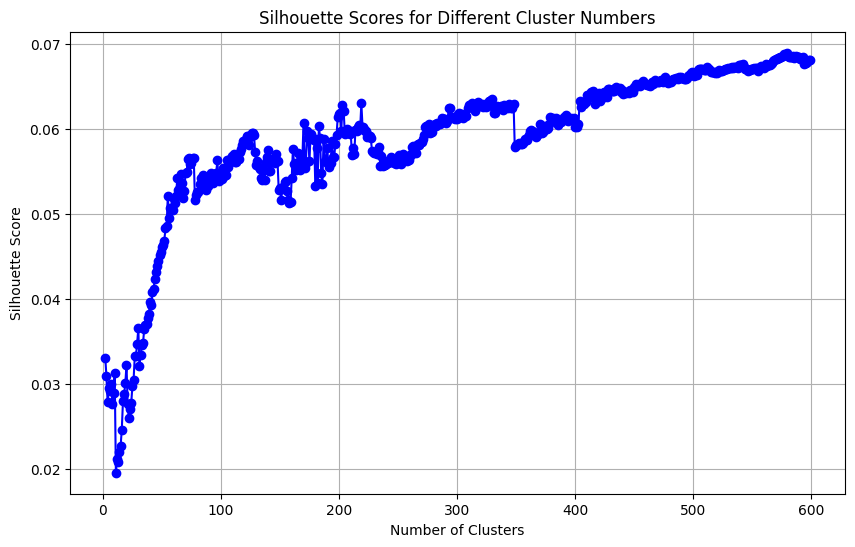

In [4]:
# 例として関数を呼び出す
model_path = '../data/japanese_word2vec_vectors.vec'  # モデルのパスを指定
cluster_range = range(2, 600, 1)  # クラスタ数の範囲を指定

kmeans_cluster_nouns_with_silhouette(model_path, cluster_range)

In [5]:
import MeCab
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def kmeans_cluster_nouns_with_silhouette(model_path, cluster_range, batch_size=10000):
    """
    名詞に対してK-meansクラスタリングを行い、シルエットスコアを計算し、クラスタ数ごとにスコアをプロットする。
    """
    # Word2Vecモデルの読み込み
    model = KeyedVectors.load_word2vec_format(model_path, binary=False)

    # MeCabの初期化
    mecab = MeCab.Tagger('-r /opt/homebrew/etc/mecabrc -d /opt/homebrew/lib/mecab/dic/ipadic')

    # 名詞を格納するリスト
    nouns = []

    # モデル内の単語を解析して名詞を抽出
    for idx, word in enumerate(model.index_to_key):
        parsed = mecab.parse(word)
        for line in parsed.splitlines():
            if line == 'EOS':
                break
            fields = line.split('\t')
            if len(fields) > 1:
                pos_info = fields[1].split(',')
                if pos_info[0] == '名詞':
                    nouns.append(word)
                    break
        if len(nouns) >= batch_size:
            break  # バッチサイズに到達したら停止

    # 名詞のベクトルを取得
    noun_vectors = np.array([model[word] for word in nouns])

    silhouette_scores = []
    for num_clusters in cluster_range:
        print(f"Processing {num_clusters} clusters...")

        # K-meansクラスタリングの実行
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        cluster_indices = kmeans.fit_predict(noun_vectors)

        # シルエットスコアの計算
        score = silhouette_score(noun_vectors, cluster_indices)
        silhouette_scores.append(score)
        print(f"Silhouette Score for {num_clusters} clusters: {score}")

    # クラスタ数とシルエットスコアのグラフを描画
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Cluster Numbers')
    plt.grid(True)
    plt.show()


Processing 2 clusters...
Silhouette Score for 2 clusters: 0.03312988579273224
Processing 3 clusters...
Silhouette Score for 3 clusters: 0.03092874214053154
Processing 4 clusters...
Silhouette Score for 4 clusters: 0.027859607711434364
Processing 5 clusters...
Silhouette Score for 5 clusters: 0.029503606259822845
Processing 6 clusters...
Silhouette Score for 6 clusters: 0.029197460040450096
Processing 7 clusters...
Silhouette Score for 7 clusters: 0.030043866485357285
Processing 8 clusters...
Silhouette Score for 8 clusters: 0.02761663869023323
Processing 9 clusters...
Silhouette Score for 9 clusters: 0.02894708514213562
Processing 10 clusters...
Silhouette Score for 10 clusters: 0.03128395974636078
Processing 11 clusters...
Silhouette Score for 11 clusters: 0.01959298364818096
Processing 12 clusters...
Silhouette Score for 12 clusters: 0.02117050252854824
Processing 13 clusters...
Silhouette Score for 13 clusters: 0.020853009074926376
Processing 14 clusters...
Silhouette Score for 14 c

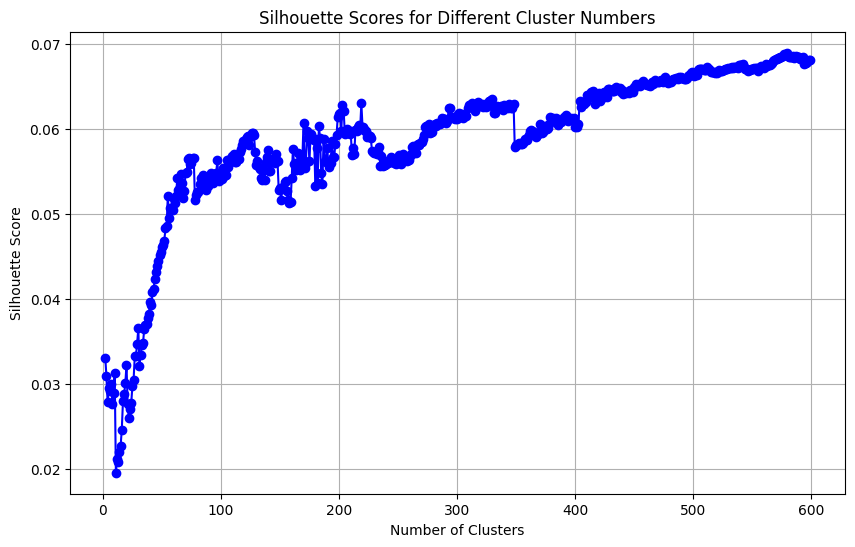

In [6]:
# 例として関数を呼び出す
model_path = '../data/japanese_word2vec_vectors.vec'  # モデルのパスを指定
cluster_range = range(2, 600, 1)  # クラスタ数の範囲を指定

kmeans_cluster_nouns_with_silhouette(model_path, cluster_range)